# DBSCAN clustering

One distinct disadvantage of k-means clustering approaches is the requirement to know $k$ before actually clustering. Oftentimes, the number of clusters is not known beforehand and an extensive evaluation for all possible values of $k$ requires intensive computation times. The presented density-based DBSCAN method circumvents this issue.

In [40]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rc('image', cmap='nipy_spectral')
X = np.loadtxt('data/shapes.txt')

# You can copy the same function you implemented in 8.1 over here.
def plot_clustering(data, labels, centroids=None, title='', ax=None):
    # Your code below here
    ax.scatter(X[:, 0], X[:, 1], c=labels)
    ax.set_title(title)
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], c='magenta', s=150, marker='+')

In [41]:
X.shape

(792, 2)

#### Task 1

Evaluate the k-means algorithm on the provided `shapes` data set and plot its results. To choose suitable values $k$, evaluate the average silhouette score for values for $k \in [2, 20]$. Then apply k-means for the k values you chose. How would you rate the resulting cluster assignments?

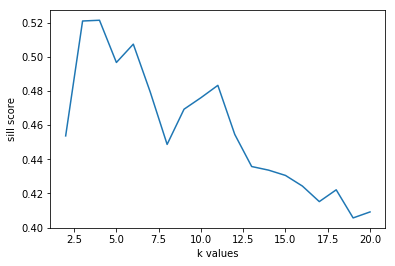

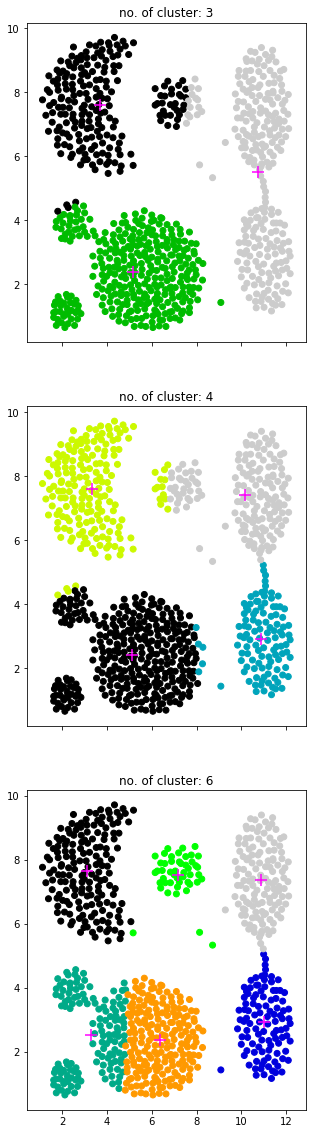

In [42]:
scores = []
# Your code below here
Ks = range(2,21)
for n_clusters in Ks:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores.append(silhouette_avg)
    
fig, ax1 = plt.subplots(1, 1)
ax1.plot(Ks, scores)
ax1.set_xlabel("k values")
ax1.set_ylabel("sill score")

good_Ks = [3, 4, 6]
k_values = np.array(good_Ks)
scores = []
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 20), sharex=True)
for i, n_cluster in enumerate(k_values):
    clusterer = KMeans(n_clusters=n_cluster, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    cluster_centroids = clusterer.cluster_centers_
    plot_clustering(X, labels=cluster_labels, centroids= cluster_centroids,
                    title='no. of cluster: %i' %n_cluster, ax=axes[i])

#### Task 2

a) Use the `DBSCAN` algorithm provided by sklearn to calculate a new clustering of the data. Plot the results in a scatter plot colored by cluster label. Which clustering result do you prefer, one of the k-means runs or the DBSCAN clustering?

b) Calculate the silhouette score for the DBSCAN clustering result, compare them and explain the difference. Which part of the silhouette score formula is presumably responsible for this difference?

*Note:* DBSCAN produces also an outlier cluster with the label `-1`. Using the `nipy_spectral` colormap, data points belonging to this cluster are always plotted in black. For calculation of the silhouette score, do not consider the samples contained in the outlier cluster.

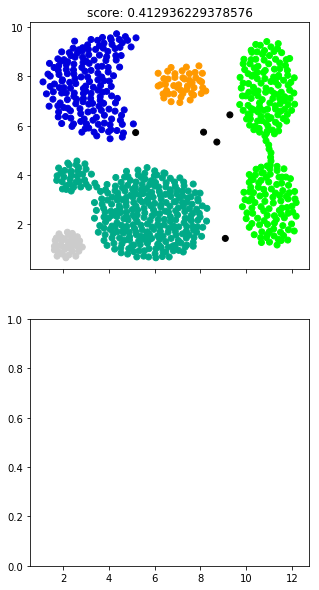

In [52]:
# Your code below here
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), sharex=True)
dbscan = DBSCAN().fit(X)
labels = dbscan.labels_
select_idx = labels>=0
X_no_outliers = X[select_idx, :]
labels_no_outliers = labels[labels_idx]

sill_score = silhouette_score(X_filtered, labels_filtered)

plot_clustering(X, labels=labels,
                title=f'score: {sill_score}' , ax=axes[i])

#### Task 3

Run the DBSCAN on the following modified versions of the shapes data set `X_1` and `X_2`. Plot the clustering results. Explain the results and try to modify DBSCAN's hyperparameters in such a way that it produces more sensible results for the modified datasets.

In [53]:
X_1 = X*0.4
X_2 = X*2

# Your code below here

dbscan = DBSCAN().fit(X_1)
plot_clustering(X_1, dbscan.labels_, title=f'DBSCAN for X_1')

dbscan = DBSCAN().fit(X_2)
plot_clustering(X_2, dbscan.labels_, title=f'DBSCAN for X_2')

# as the 'new' data sets are only rescaled versions of the original data set,
# we simply need to adjust the density parameter eps

dbscan = DBSCAN(eps=.5*.4).fit(X_1)
plot_clustering(X_1, dbscan.labels_, title=f'Density corrected DBSCAN for X_1')

dbscan = DBSCAN(eps=.5*2).fit(X_2)
plot_clustering(X_2, dbscan.labels_, title=f'Density corrected DBSCAN for X_2')




AttributeError: 'NoneType' object has no attribute 'scatter'

#### Silhouette score for each data point individually

As we learned previously, the silhouette score can be calculated for each sample individually while we so far only used the average value.

The provided function `plot_silhouette_samples` visualizes the silhouette score for each data point individually. This function sorts the silhouette scores for each data point contained in a cluster in a descending fashion The red line indicates the average silhouette score of all data points across clusters. Note that this function discards outlier clusters, as these distort silhouette scores if considered as a regular cluster.

#### Task 4

Plot and interpret the results of using DBSCAN with default `eps=0.5` on data set `X` and compare it with silhouette scores obtained using k-means ($k=4$).

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

def plot_silhouette_samples(data, labels, title=''):
    idx_no_outliers = labels >= 0
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    plot_clustering(data, labels, title='Clustering ' + title, ax=axes[0])
    # discard outliers for calculation of silhouette scores
    outliers_present = np.min(labels) == -1
    data = data[idx_no_outliers, :]
    labels = labels[idx_no_outliers]
    avg_score = silhouette_score(data, labels)
    ax = axes[1]
    ax.axvline(avg_score, linestyle='--', c='r')
    n_clusters = np.max(labels)
    sample_score = silhouette_samples(data, labels)
    y_lower = 10
    for i in range(n_clusters+1):
        ith_cluster_sample_score = \
            sample_score[labels == i]

        ith_cluster_sample_score.sort()

        size_cluster_i = ith_cluster_sample_score.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+int(outliers_present)) /
                                 (n_clusters+int(outliers_present)))
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_sample_score,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 1  # 10 for the 0 samples
    ax.set_title('Silhouette samples ' + title)
    ax.set_xlim(-1, 1)

In [ ]:
# Your code below here




### Notes

Data sets in assignment 10 were taken from [1] and slightly modified.

[1] P. Fränti and S. Sieranoja
K-means properties on six clustering benchmark datasets
Applied Intelligence, 48 (12), 4743-4759, December 2018